In [1]:
import re
import matplotlib.pyplot as plt
from pymatgen.core.physical_constants import c,h,e
from math import sqrt,pi
import re
import numpy as np
import glob

def parse_absorption(filename):
    omega = []
    epsilon2 = []
    epsilon1 =  []
    jdos = []
    with open(filename,'r') as f:
        for line in f:
            if line.split()[0]!='#':
                omega.append(float(line.split()[0]))
                epsilon2.append(float(line.split()[1]))
                epsilon1.append(float(line.split()[2]))
                jdos.append(float(line.split()[3])*500) ####exagerated
    return omega,epsilon2,epsilon1,jdos

def calculate_absorption(filename):
    omega,epsilon2,epsilon1,jdos = parse_absorption(filename)
    constant = 4*pi*e/(h*c)*0.01
    nedos = len(omega)
    norm = np.zeros(nedos)
    k = np.zeros(nedos)
    absorption = np.zeros(nedos)
    for i in range(nedos):
        norm[i] = sqrt(epsilon2[i]**2+epsilon1[i]**2)
        k[i] = sqrt(2)/2*sqrt(norm[i]-epsilon1[i])
        absorption[i] = omega[i]*k[i]*constant
    return absorption
    


/Users/yao/Google Drive/data/BGW-test/CsSnI3/convergence/K_fine/absorption_eh.10
/Users/yao/Google Drive/data/BGW-test/CsSnI3/convergence/K_fine/absorption_eh.12
/Users/yao/Google Drive/data/BGW-test/CsSnI3/convergence/K_fine/absorption_eh.14
/Users/yao/Google Drive/data/BGW-test/CsSnI3/convergence/K_fine/absorption_eh.16


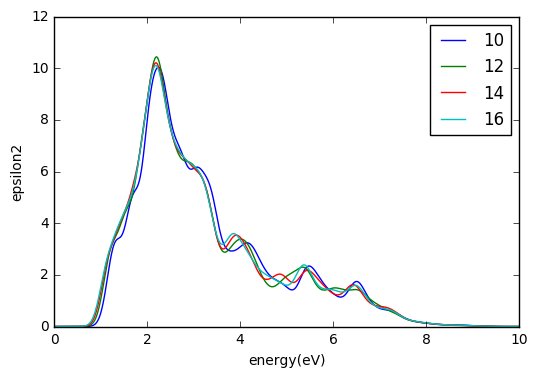

In [2]:
#directory = '/Users/yao/Google Drive/data/BGW-test/Si/convergence/Bands_fine/'
#directory = '/Users/yao/Google Drive/data/BGW-test/Si/convergence/K_fine/'
#directory = '/Users/yao/Google Drive/data/BGW-test/Si/convergence/Bands_coarse/'
#directory = '/Users/yao/Google Drive/data/BGW-test/Si/convergence/K_coarse/'
directory = '/Users/yao/Google Drive/data/BGW-test/Cs2SnI6/convergence/K_fine/'
filenames = glob.glob(directory+'absorption_eh.*')
for filename in filenames:
    number = str(filename.split('.')[1])
    omega,epsilon2,epsilon1,jdos = parse_absorption(filename)
    print(filename)
    plt.plot(omega, epsilon2, label=number)
plt.legend()
plt.xlim([0,10])
#plt.ylim([0,50])
plt.xlabel('energy(eV)')
plt.ylabel('epsilon2')
plt.savefig(directory+'absorption_convergence.eps')
plt.show()
